In [66]:
import os
import pandas as pd
from dateutil import parser
import calendar

In [33]:
### Merging  all seperate csv  files into one main file:
# Define the path to the directory containing the CSV files
directory_path = 'Sales_Data'

# List all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) ]

# Initialize an empty list to store DataFrames
dataframes = []
for file in csv_files:
    print(file)

# Loop through the CSV files and read each one into a DataFrame
for file in csv_files:
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all the DataFrames into one big DataFrame
all_data = pd.concat(dataframes, ignore_index=True)

# Now `big_dataframe` contains all the data from the CSV files
all_data.head(10) # Display the first few rows of the big DataFrame





Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


In [15]:
# STore a csv file 
all_data.to_csv("ALL_DATA.csv",index=False)

In [34]:
all_data.shape

(186850, 6)

In [42]:
all_data =pd.read_csv("ALL_DATA.csv")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Question 1: What was the best month for sale? How much was earned that month?
-> Task 1 : Add Month Column
->Task2 : GroupBy

In [49]:
# Drop rows with any NaN values
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head
all_data=all_data.dropna(how="all")

all_data.head()

def convert_dates(date):
    try:
        # Convert using a flexible parser from dateutil
        return parser.parse(date)
    except ValueError:
        # If parsing fails, return None or pd.NaT
        return pd.NaT

# Apply this function to the 'Order Date' column
all_data['Order Date'] = all_data['Order Date'].apply(convert_dates)

# After conversion, drop rows where 'Order Date' is NaT
all_data = all_data.dropna(subset=['Order Date'])

# Extract the month now that 'Order Date' is cleaned and converted
all_data['Month'] = all_data['Order Date'].dt.month




,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [54]:

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


In [ ]:
all_data.shape


In [57]:
#Transforming Data 
all_data["Quantity Ordered"]= pd.to_numeric(all_data['Quantity Ordered'])
all_data["Price Each"]= pd.to_numeric(all_data['Price Each'])


In [58]:
all_data['Sales'] = all_data["Price Each"]*all_data["Quantity Ordered"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [63]:
monthly_totals = all_data.groupby('Month')[['Quantity Ordered','Price Each', 'Sales']].sum()
print(monthly_totals)

       Quantity Ordered  Price Each       Sales
Month                                          
1                 10903  1811768.38  1822256.73
2                 13449  2188884.72  2202022.42
3                 17005  2791207.83  2807100.38
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 13448  2230345.42  2244467.88
9                 13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34


Plotting The sales 

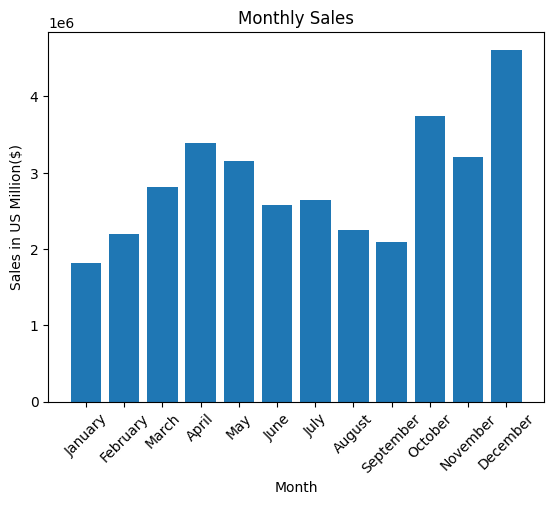

In [71]:
import matplotlib.pyplot as plt
months = [calendar.month_name[i] for i in range(1, 13)]

# Assuming 'monthly_totals' has your summed data with a column named 'Sales'
sales = monthly_totals['Sales']

plt.bar(months, sales)  # Use month names for the x-axis labels
plt.xticks(months, rotation=45)  # Rotate labels if they overlap
plt.ylabel("Sales in US Million($)")
plt.xlabel('Month')
plt.title('Monthly Sales')
plt.show()

Question 2: What City had the highest Number of sales?


In [74]:
###Add a City Column
def extract_city_state(address):
    # Split the address by comma
    parts = address.split(',')
    
    # Check if the split parts are sufficient to extract city and state
    if len(parts) > 2:  # Assuming there are at least three parts: street, city, state and zip
        city = parts[1].strip()  # City is the second element, strip leading/trailing spaces
        state_zip = parts[2].strip()  # State and zip code are in the third element
        state = state_zip.split()[0]  # State should be the first part before any space
        
        return city + ', ' + state
    else:
        return "Invalid address format"
    
all_data['City']= all_data['Purchase Address'].apply(extract_city_state)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA"


In [76]:
city_sales = all_data.groupby('City')[['Quantity Ordered','Price Each', 'Sales']].sum()
print(city_sales)

                   Quantity Ordered  Price Each       Sales
City                                                       
Atlanta, GA                   16602  2779908.20  2795498.58
Austin, TX                    11153  1809873.61  1819581.75
Boston, MA                    22528  3637409.77  3661642.01
Dallas, TX                    16730  2752627.82  2767975.40
Los Angeles, CA               33289  5421435.23  5452570.80
New York City, NY             27932  4635370.83  4664317.43
Portland, ME                   2750   447189.25   449758.27
Portland, OR                  11303  1860558.22  1870732.34
San Francisco, CA             50239  8211461.74  8262203.91
Seattle, WA                   16553  2733296.01  2747755.48


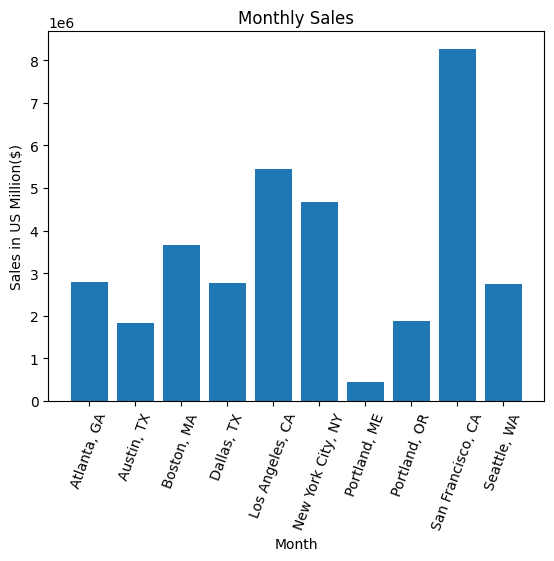

In [83]:
import matplotlib.pyplot as plt


# Assuming 'monthly_totals' has your summed data with a column named 'Sales'
cities= [city for city,df in all_data.groupby('City')]

plt.bar(cities, city_sales['Sales'])  # Use month names for the x-axis labels
plt.xticks(cities, rotation=70)  # Rotate labels if they overlap
plt.ylabel("Sales in US Million($)")
plt.xlabel('Month')
plt.title('Monthly Sales')
plt.show()

Question 3: What Time should we display Advirtisments tomaximize liklihood of customer's buying product?

In [88]:
all_data["Hour"]=all_data['Order Date'].dt.hour
all_data["Minute"]=all_data['Order Date'].dt.minute
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


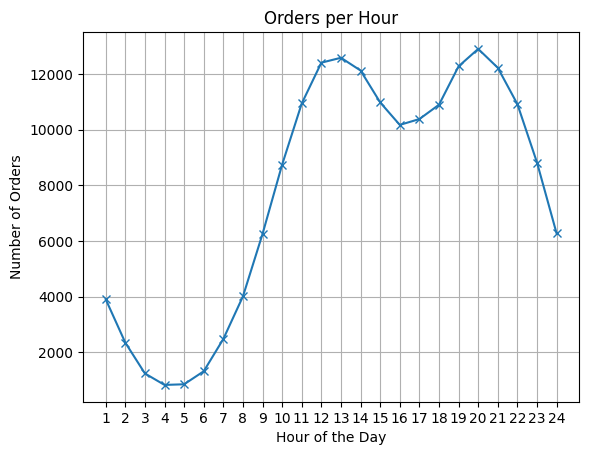

In [96]:
import matplotlib.pyplot as plt

# Group by 'Hour' and count the occurrences
hourly_data = all_data.groupby('Hour').count()

# Assuming 'Order ID' can be used to count occurrences each hour
hours = hourly_data.index+1  # This captures the hour values from the index after grouping
counts = hourly_data['Order ID']  # This gives us the counts per hour

# Plotting the data
plt.plot(hours, counts, marker='x')  # Using 'marker' to mark each point on the plot
plt.xticks(hours)  # Ensure all hour labels are shown on the x-axis
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Orders per Hour')
plt.grid(True)  # Optional: adds a grid for easier reading
plt.show()



Question 4 : What Products are sold moreo ften together?

In [102]:
df = all_data[all_data['Order ID'].duplicated(keep =False)]
df['Grouped'] = df.groupby("Order ID")['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head(50)

C:\Users\steve\AppData\Local\Temp\ipykernel_13456\1732681950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby("Order ID")['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [108]:
from itertools import combinations
from collections import Counter

count= Counter()
for row in df["Grouped"]:
    rowlist = row.split(',')
    count.update(Counter(combinations(rowlist,2)))


for key, value in count.most_common(10):
        print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


Question 5: What Product sold the most ? and why?

In [110]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,"Dallas, TX",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,"Boston, MA",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,"Los Angeles, CA",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,"Los Angeles, CA",9,27


In [117]:
product_group  =  all_data.groupby('Product')[['Quantity Ordered','Sales']].sum()
quantity_ordered  =  product_group[['Quantity Ordered','Sales']].sum()

print(product_group)


                            Quantity Ordered       Sales
Product                                                 
20in Monitor                            4129   454148.71
27in 4K Gaming Monitor                  6244  2435097.56
27in FHD Monitor                        7550  1132424.50
34in Ultrawide Monitor                  6199  2355558.01
AA Batteries (4-pack)                  27635   106118.40
AAA Batteries (4-pack)                 31017    92740.83
Apple Airpods Headphones               15661  2349150.00
Bose SoundSport Headphones             13457  1345565.43
Flatscreen TV                           4819  1445700.00
Google Phone                            5532  3319200.00
LG Dryer                                 646   387600.00
LG Washing Machine                       666   399600.00
Lightning Charging Cable               23217   347094.15
Macbook Pro Laptop                      4728  8037600.00
ThinkPad Laptop                         4130  4129958.70
USB-C Charging Cable           

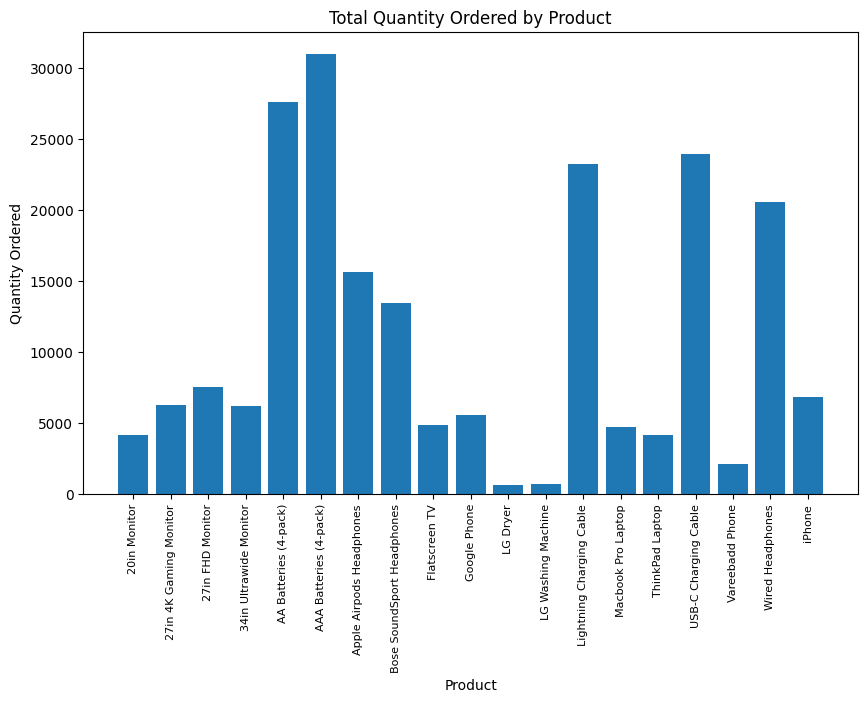

In [121]:
import matplotlib.pyplot as plt

# Group data by 'Product' and sum only the numeric columns 'Quantity Ordered' and 'Sales'
product_group = all_data.groupby('Product')[['Quantity Ordered', 'Sales']].sum()

# Extract product names (index of the grouped data)
products = product_group.index.tolist()  # Convert index to list for easier handling

# Extract quantity ordered for each product
quantity_ordered = product_group['Quantity Ordered']

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation=90, size=8)  # Rotate x-axis labels for better readability
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Total Quantity Ordered by Product')
plt.show()  # Ensure this is called to display the plot


In [125]:

prices = all_data.groupby("Product")[['Price Each']].mean()
print(prices)

                            Price Each
Product                               
20in Monitor                    109.99
27in 4K Gaming Monitor          389.99
27in FHD Monitor                149.99
34in Ultrawide Monitor          379.99
AA Batteries (4-pack)             3.84
AAA Batteries (4-pack)            2.99
Apple Airpods Headphones        150.00
Bose SoundSport Headphones       99.99
Flatscreen TV                   300.00
Google Phone                    600.00
LG Dryer                        600.00
LG Washing Machine              600.00
Lightning Charging Cable         14.95
Macbook Pro Laptop             1700.00
ThinkPad Laptop                 999.99
USB-C Charging Cable             11.95
Vareebadd Phone                 400.00
Wired Headphones                 11.99
iPhone                          700.00


C:\Users\steve\AppData\Local\Temp\ipykernel_13456\3535629850.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products,rotation = 'vertical',size =8)


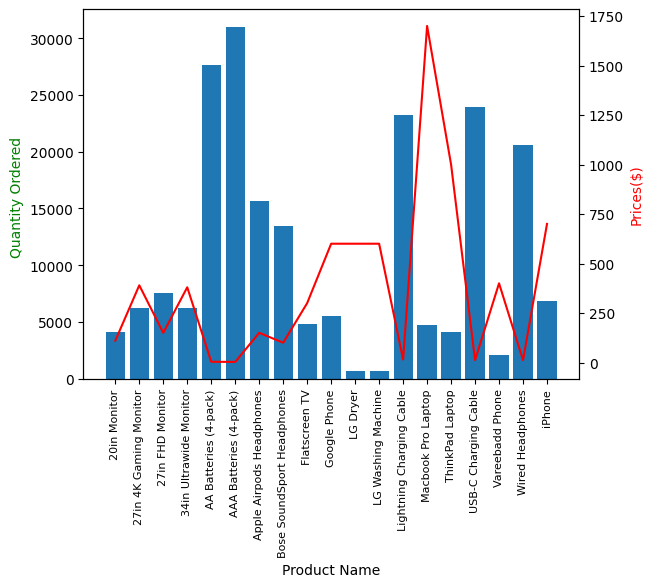

In [133]:
fig, ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity_ordered)
ax2.plot(products,prices,"r-")
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered ', color ="g")
ax2.set_ylabel ('Prices($)',color = 'r')
ax1.set_xticklabels(products,rotation = 'vertical',size =8)
plt.show()